# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [2]:
# Your code here:
diabetes = sklearn.datasets.load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [3]:
# Your code here:

diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [4]:
# Your code here:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:
    - Age
    - Sex
    - Body mass index
    - Average blood pressure
    - S1
    - S2
    - S3
    - S4
    - S5
    - S6

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [5]:
# Your code here:
diabetes['data'].shape    

(442, 10)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [6]:
# Your code here:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Initialize the model in the variable `diabetes_model`

In [7]:
# Your code here:

diabetes_model = linear_model.LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [8]:
# Your code here:

diabetes_x = diabetes['data']
diabetes_y = diabetes['target']

#create the model
diabetes_model.fit(diabetes_x, diabetes_y)

#now we print the model coefficients
#print(diabetes_model.intercept_, diabetes_model.coef_)
df = pd.DataFrame(diabetes_x, columns=diabetes["feature_names"])


print('intercept', diabetes_model.intercept_)
for coef, var in zip(diabetes_model.coef_, df.columns):
    print(var, coef)


intercept 152.1334841628965
age -10.012197817470652
sex -239.81908936565569
bmi 519.8397867901344
bp 324.3904276893768
s1 -792.1841616283056
s2 476.74583782366216
s3 101.04457032134424
s4 177.0641762322499
s5 751.2793210873948
s6 67.6253863910439


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


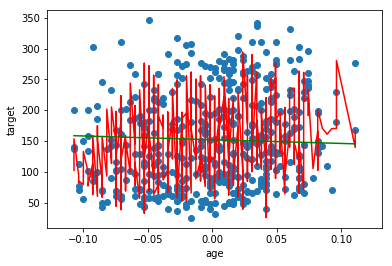

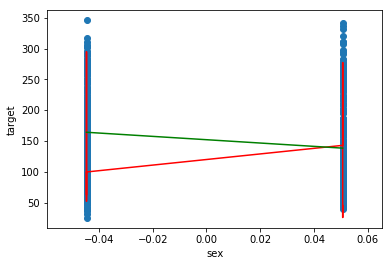

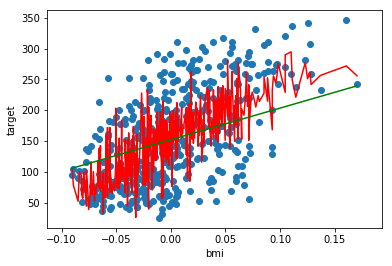

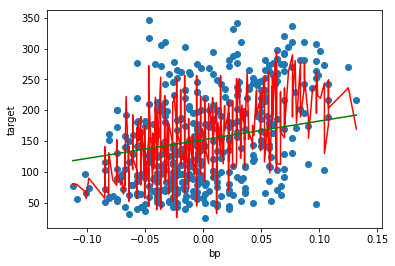

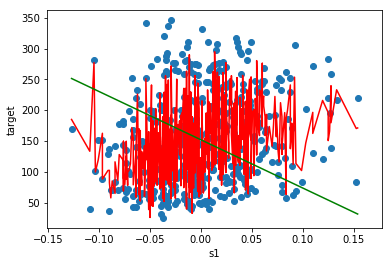

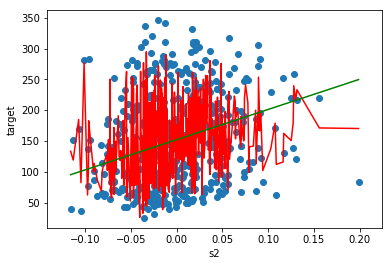

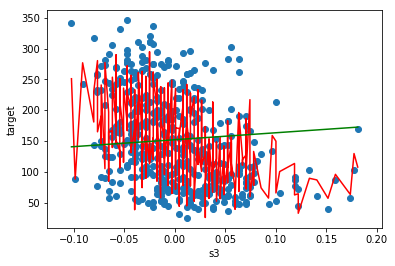

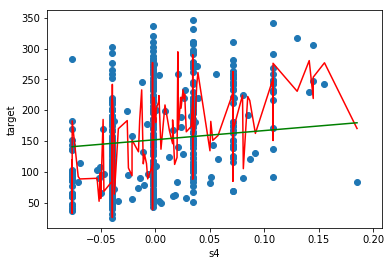

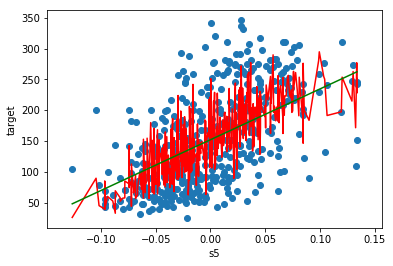

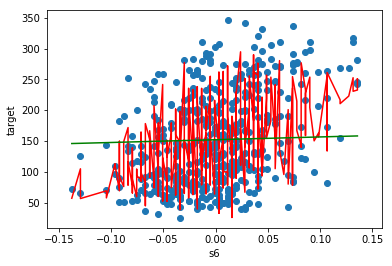

In [50]:
## ADDED to interpret

print(diabetes.keys())

# target is a quantitative measure of disease progression one year after baseline.
df = pd.DataFrame(diabetes_x, columns=diabetes["feature_names"])
# target with the x's
df['target'] = diabetes_y

import matplotlib.pyplot as plt

for  var, coef in zip([x for x in df.columns if x!='target'], diabetes_model.coef_):
    # Scatter data
    plt.scatter(df[var], df['target'])
    # Labels x and y
    plt.xlabel(var)
    plt.ylabel('target')
    # We predict using the computed parameters and the x data (that we used to calibrate the model)
    predictions = diabetes_model.predict(diabetes_x)
    # We must sort according to the x values (and the y values in place)
    to_plot = pd.DataFrame([df[var], predictions]).T
    # Names of columns
    to_plot.columns = [var, "prediction"]
    # Sort values according to x
    to_plot.sort_values(var, inplace=True)
    # Plot regression line
    plt.plot(to_plot[var], to_plot['prediction'], color='red')
    
    
    # Regression line with all variables equal to the mean except the one in x-axis
    
    predictions_2 = [coef * x + diabetes_model.intercept_ for x in to_plot[var].tolist()]
    
    
    plt.plot(to_plot[var], predictions_2, color='green')
    
    
    
    # Display
    plt.show()
        

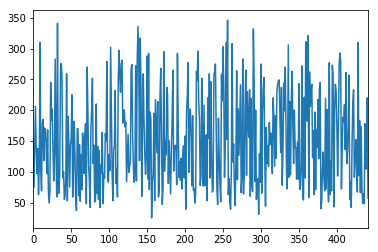

In [10]:
df.target.plot()
plt.show()

# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [11]:
# Your code here:
# Régression linéaire : étude des liens entre SalePrice (variable dépendante) et les variables indépendantes retenues

import statsmodels.api as sm

# Get X_train
X_train = sm.add_constant(df.drop("target",axis=1)).copy()
# Get y_train
Y_train = df["target"]
model = sm.OLS(Y_train,X_train).fit()

## Make predictions on the dataset, store the results in "predictions"
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           3.83e-62
Time:                        13:10:12   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
# Your code here:
# Régression linéaire : étude des liens entre SalePrice (variable dépendante) et les variables indépendantes retenues

import statsmodels.api as sm

# Get X_train
X_train = sm.add_constant(df.drop("target",axis=1)).copy()[['const', "sex", "bmi", "bp", "s1","s5"]]
# Get y_train
Y_train = df["target"]
model = sm.OLS(Y_train,X_train).fit()

## Make predictions on the dataset, store the results in "predictions"
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     87.15
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.19e-63
Time:                        13:10:12   Log-Likelihood:                -2394.0
No. Observations:                 442   AIC:                             4800.
Df Residuals:                     436   BIC:                             4825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.608     58.331      0.0

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [13]:
# Your code here:

auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [14]:
# Your code here:
auto.head()
    #mpg stands for Miles Per Gallon

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [15]:
# Your code here:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horse_power     392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [16]:
# Toutes les colonnes censées être float ou int le sont.

What is the newest model year and the oldest model year?

In [17]:
# Your code here:
print('oldest model year:',auto['model_year'].min(),'/ newest model year:',auto['model_year'].max())

oldest model year: 70 / newest model year: 82


Check the dataset for missing values and remove all rows containing at least one missing value.

In [18]:
# Your code here:
missing_values = auto.loc[auto.isna().any(axis=1) ==True]
missing_values


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,"\t""ford pinto"""
126,21.0,6,200.0,NaN,2875,17.0,74,"\t""ford maverick"""
330,40.9,4,85.0,NaN,1835,17.3,80,"\t""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905,14.3,80,"\t""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320,15.8,81,"\t""renault 18i"""
374,23.0,4,151.0,NaN,3035,20.5,82,"\t""amc concord dl"""


In [19]:
auto = auto.dropna()

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [20]:
# Your code here:

auto.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [21]:
# il y a 5 types de valeurs possible de cylindres

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [22]:
# Import the necessary function
from sklearn.model_selection import train_test_split


In [23]:
#train sur le précédent dataset : Diabetes

# Your code here:
diabetes_x = diabetes['data']
diabetes_y = diabetes['target']

X = diabetes['data']
y = diabetes['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80)
X_train, X_test, y_train, y_test

#create the model
diabetes_model.fit(X_train, y_train)

#now we print the model coefficients
#print(diabetes_model.intercept_, diabetes_model.coef_)


print('intercept', diabetes_model.intercept_)
for coef, var in zip(diabetes_model.coef_, df.columns):
    print(var, coef)


intercept 152.0019934484693
age -60.66039553858171
sex -270.47662929803187
bmi 512.7530930264272
bp 303.1418784533104
s1 -784.1552971216051
s2 491.17469428285693
s3 112.73822317220046
s4 148.448826277789
s5 825.6680058014148
s6 45.08761216386236


In [24]:
# Your code here:
auto = auto.drop(columns=['car_name'])

In [25]:
auto.head(3)

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70


In [26]:
x_columns = [col for col in auto.columns.values if col != "mpg"]
X = auto[x_columns]
y = auto["mpg"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80)
#X_train, X_test, y_train, y_test

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [27]:
# Your code here:
#create the model
auto_model = linear_model.LinearRegression()

Next, fit the model in the cell below.

In [28]:
# Your code here:

auto_model.fit(X_train, y_train)

#now we print the model coefficients
#print(auto_model.intercept_, auto_model.coef_)

print('intercept', auto_model.intercept_,'\n')
for coef, var in zip(auto_model.coef_, auto.columns):
    print(var, coef)

#score returns the coefficient of determination or r squared. 
#This number tells us what proportion of the variation in the data is explained by the model
print('\nr squared', round(auto_model.score(X_train, y_train),3))

intercept -12.823169755395956 

mpg -0.3409922038737885
cylinders 0.012937463425678286
displacement -0.013910816423423355
horse_power -0.007055739218103246
weight 0.043342886399220376
acceleration 0.7557261753673413

r squared 0.809


In [29]:
## Fit the linear regression model on the data

import statsmodels.api as sm
Xc_train = sm.add_constant(X_train)
model = sm.OLS(y_train,Xc_train).fit()

## Make predictions on the dataset, store the results in "predictions"
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     215.7
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          9.59e-107
Time:                        13:10:13   Log-Likelihood:                -831.17
No. Observations:                 313   AIC:                             1676.
Df Residuals:                     306   BIC:                             1703.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.8232      5.307     -2.416   

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [30]:
# Import the necessary function:
from sklearn.metrics import r2_score


In [31]:
# Your code here:
y_true = y_train
y_pred = auto_model.predict(X_train)

print('\nr squared', round(r2_score(y_true, y_pred),3))


r squared 0.809


#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [32]:
# Your code here:

y_test_pred = auto_model.predict(X_test)

print('\nr squared', round(r2_score(y_test, y_test_pred),3))


r squared 0.805


# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [33]:
# Your code here:

X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.10, train_size=0.90)


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [34]:
# Your code here:
auto_model09 = linear_model.LinearRegression()
auto_model09.fit(X_train09,y_train09)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Compute the predicted values and r squared score for our new model and new sample data.

In [35]:
# Your code here:
y_true09 = y_train09
y_pred09 = auto_model.predict(X_train09)

print('\nr squared', round(r2_score(y_true09, y_pred09),3))


r squared 0.804


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [36]:
# Your code here:
y_test_pred09 = auto_model.predict(X_test09)

print('\nr squared', round(r2_score(y_test09, y_test_pred09),3))


r squared 0.831


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [37]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [38]:
# Your code here:

selector = RFE(auto_model, n_features_to_select=3) #, step=1, verbose=0)


Fit the model and print the ranking

In [49]:
# Your code here:
selector = selector.fit(X_train, y_train)
selector.ranking_
#ranking_ 

array([1, 3, 2, 4, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [51]:
# Your code here:

X_reduced = auto[['cylinders', "acceleration", "model_year"]]
y_reduced = auto["mpg"]


X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.20, train_size=0.80)


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [52]:
# Your code here: 

#create the model
auto_model_reduced = linear_model.LinearRegression()
auto_model_reduced.fit(X_train_reduced, y_train_reduced)

y_pred_reduced = auto_model_reduced.predict(X_train_reduced)

#print('\nr squared', round(,3))
r2_score(y_train_reduced, y_pred_reduced)

0.7117429517386828